In [138]:
import numpy as np
from keras.datasets import imdb
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [139]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [140]:
word_index = imdb.get_word_index()

In [141]:
word_index = dict([(value, key) for (key, value) in word_index.items()])

In [142]:
def vectorize(sequences, dim=10000):
    restuls = np.zeros((len(sequences), dim))
    for i, sequences in enumerate(sequences):
        restuls[i, sequences] = 1
    return restuls

In [143]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [144]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [145]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [146]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [147]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [148]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6876 - loss: 0.6003 - val_accuracy: 0.8670 - val_loss: 0.3973
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8917 - loss: 0.3385 - val_accuracy: 0.8603 - val_loss: 0.3474
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9205 - loss: 0.2477 - val_accuracy: 0.8898 - val_loss: 0.2819
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9376 - loss: 0.1996 - val_accuracy: 0.8693 - val_loss: 0.3197
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9466 - loss: 0.1668 - val_accuracy: 0.8878 - val_loss: 0.2756
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9578 - loss: 0.1323 - val_accuracy: 0.8852 - val_loss: 0.2927
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9666 - loss: 0.1143 - val_accuracy: 0.8795 - val_loss: 0.3222
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9728 - loss: 0.0963 - val_accuracy: 0.8700 - v

In [149]:
import matplotlib.pyplot as plt

In [150]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

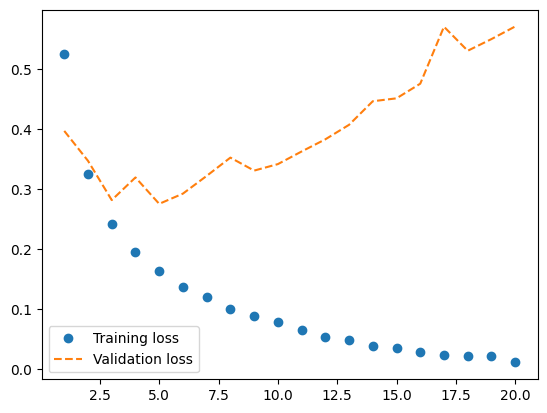

In [151]:
plt.plot(epochs, loss_values, 'o', label='Training loss')
plt.plot(epochs, val_loss_values, '--', label='Validation loss')
plt.legend()
plt.show()

In [152]:
model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8526 - loss: 0.6360


[0.6234006881713867, 0.8573600053787231]

In [153]:
model2 = Sequential()
model2.add(Dense(4, activation='relu', input_shape=(10000,)))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [154]:
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [155]:
history_2 = model2.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5656 - loss: 0.6678 - val_accuracy: 0.7647 - val_loss: 0.5901
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7609 - loss: 0.5569 - val_accuracy: 0.7937 - val_loss: 0.5282
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8449 - loss: 0.4922 - val_accuracy: 0.8464 - val_loss: 0.4824
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8950 - loss: 0.4283 - val_accuracy: 0.8806 - val_loss: 0.4297
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9268 - loss: 0.3641 - val_accuracy: 0.8783 - val_loss: 0.3752
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9408 - loss: 0.2910 - val_accuracy: 0.8871 - val_loss: 0.3316
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9490 - loss: 0.2434 - val_accuracy: 0.8858 - val_loss: 0.3099
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9519 - loss: 0.2069 - val_accuracy: 0.8884 - v

In [156]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_lost_values_2 = history_2.history['val_loss']

epochs = range(1, len(loss_values) + 1)

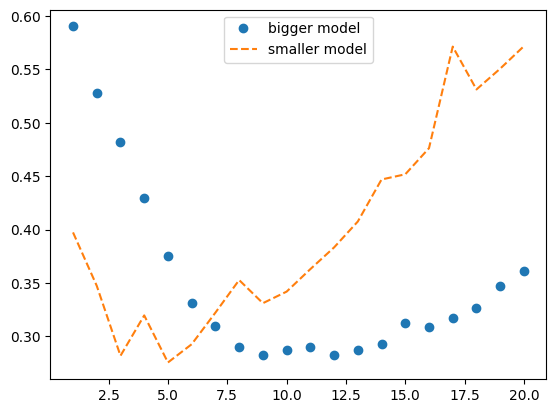

In [157]:
plt.plot(epochs, val_lost_values_2, 'o', label='bigger model')
plt.plot(epochs, val_loss_values, '--', label='smaller model')
plt.legend()
plt.show()

In [158]:
from keras import regularizers

In [159]:
model3 = Sequential()
model3.add(Dense(4, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.001)))
model3.add(Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_3 = model3.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6460 - loss: 0.6805 - val_accuracy: 0.8274 - val_loss: 0.6008
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8531 - loss: 0.5671 - val_accuracy: 0.8584 - val_loss: 0.5075
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8863 - loss: 0.4716 - val_accuracy: 0.8673 - val_loss: 0.4395
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9046 - loss: 0.3935 - val_accuracy: 0.8767 - val_loss: 0.3911
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9106 - loss: 0.3439 - val_accuracy: 0.8813 - val_loss: 0.3602
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9197 - loss: 0.3059 - val_accuracy: 0.8850 - val_loss: 0.3441
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9272 - loss: 0.2740 - val_accuracy: 0.8848 - val_loss: 0.3337
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9335 - loss: 0.2584 - val_accuracy: 0.8863 - v

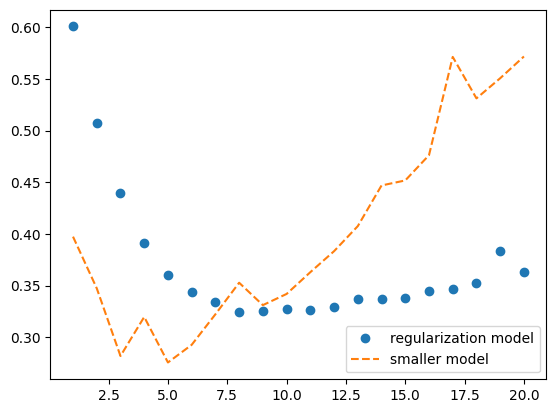

In [160]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_lost_values_3 = history_3.history['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, val_lost_values_3, 'o', label='regularization model')
plt.plot(epochs, val_loss_values, '--', label='smaller model')
plt.legend()
plt.show()


In [161]:
model4 = Sequential()
model4.add(Dense(4, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.001)))
model4.add(Dropout(0.5))
model4.add(Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model4.add(Dropout(0.5))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_4 = model4.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5233 - loss: 0.6960 - val_accuracy: 0.8142 - val_loss: 0.6550
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5608 - loss: 0.6672 - val_accuracy: 0.8490 - val_loss: 0.6228
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5815 - loss: 0.6458 - val_accuracy: 0.8643 - val_loss: 0.5949
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5841 - loss: 0.6335 - val_accuracy: 0.8653 - val_loss: 0.5835
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5901 - loss: 0.6199 - val_accuracy: 0.8653 - val_loss: 0.5713
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5916 - loss: 0.6180 - val_accuracy: 0.8618 - val_loss: 0.5683
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6009 - loss: 0.6025 - val_accuracy: 0.8789 - val_loss: 0.5370
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5963 - loss: 0.6048 - val_accuracy: 0.8840 - v

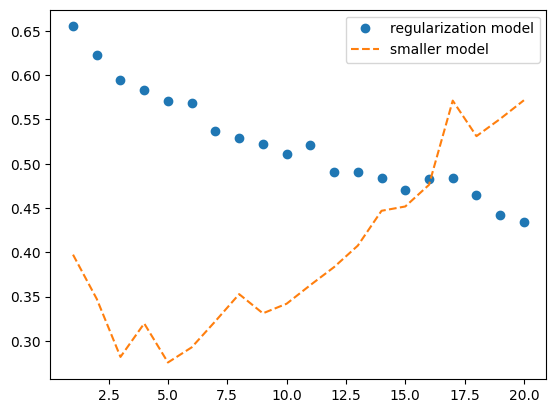

In [162]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_lost_values_4 = history_4.history['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, val_lost_values_4, 'o', label='regularization model')
plt.plot(epochs, val_loss_values, '--', label='smaller model')
plt.legend()
plt.show()